In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Constants
IMAGE_DIR = 'AKOA_Analysis'
BATCH_SIZE = 32
IMG_SIZE = (260, 228)
IMG_SHAPE = (260, 228, 3)
LR = 0.0001
TEST_PORTION = 5
SHUFFLE_RATE = 512
AUTO_TUNE = tf.data.experimental.AUTOTUNE

In [2]:
def create_dataset(image_dir, batch_size, img_size):
    # Training dataset, shuffle is True by default
    training_dataset = image_dataset_from_directory(image_dir, validation_split=0.2,
                                                    subset="training", seed=46, label_mode='int',
                                                    batch_size=batch_size, image_size=img_size)
    # Validation dataset
    validation_dataset = image_dataset_from_directory(image_dir, validation_split=0.2,
                                                      subset="validation", seed=46, label_mode='int',
                                                      batch_size=batch_size, image_size=img_size)

    # Test dataset, taking 1/5 of the validation set
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // TEST_PORTION)
    validation_dataset = validation_dataset.skip(val_batches // TEST_PORTION)

    # prefetch and shuffle images for better training
    training_dataset = training_dataset.prefetch(AUTO_TUNE)
    validation_dataset = validation_dataset.prefetch(AUTO_TUNE)
    test_dataset = test_dataset.shuffle(SHUFFLE_RATE).prefetch(AUTO_TUNE)

    return training_dataset, validation_dataset, test_dataset

In [42]:
# generate dataset
training_set, validation_set, test_set = create_dataset(IMAGE_DIR, BATCH_SIZE, IMG_SIZE)


Found 18680 files belonging to 2 classes.
Using 14944 files for training.
Found 18680 files belonging to 2 classes.
Using 3736 files for validation.


In [43]:
def process(image,label):
    image = tf.cast(image / 255. ,tf.float32)
    return image,label

In [45]:
training_set = training_set.map(process)
validation_set = validation_set.map(process)
test_set = test_set.map(process)


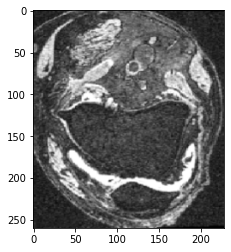

In [46]:
for i in test_set:
    plt.imshow(i[0][31])
    break